In [1]:
from selenium import webdriver

from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up Selenium WebDriver
driver = webdriver.Chrome()
url = "https://www.bbc.com/weather/293397"
driver.get(url)

# Extract HTML content
html_content = driver.page_source

# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(html_content, "html.parser")

forecast = soup.find('ol',class_='wr-day-carousel__list wr-js-day-carousel-list clearfixwr-day-carousel__list wr-js-day-carousel-list clearfix')
weather = soup.find_all('li',class_='wr-day')
# Find relevant elements and extract data
weather_data = {"Day": [],
        "Temperature": [],
        "Description": []}
for forecast in weather:
    day = forecast.find("span", class_="wr-date__long__dotm")
    temperature = forecast.find("span", class_="wr-value--temperature--c")
    description = forecast.find("div", class_="wr-day__weather-type-description-container")
    if day:
        weather_data['Day'].append(day.text[:4])
    else:
        weather_data['Day'].append(day)
    weather_data['Temperature'].append(int(temperature.text.strip().replace("°", "")))
    weather_data['Description'].append(description.text.strip())
# Close the Selenium WebDriver
driver.quit()

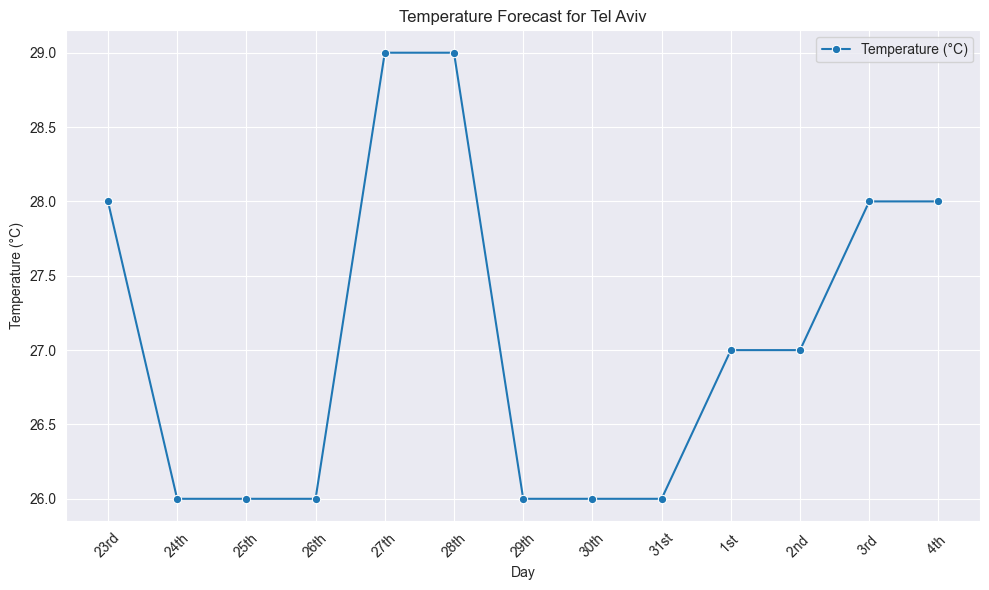

In [4]:
# Convert data to Pandas DataFrame
df_weather = pd.DataFrame(weather_data)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_weather, x="Day", y="Temperature", marker="o", label="Temperature (°C)")
plt.title("Temperature Forecast for Tel Aviv")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
df_weather

,Day,Temperature,Description
0,None,27,Sunny and a gentle breeze
1,23rd,28,Sunny and a gentle breeze
2,24th,26,Sunny and a moderate breeze
3,25th,26,Sunny and a moderate breeze
4,26th,26,Sunny and a gentle breeze
5,27th,29,Sunny and a gentle breeze
6,28th,29,Sunny and a gentle breeze
7,29th,26,Sunny and a gentle breeze
8,30th,26,Sunny and a gentle breeze
9,31st,26,Sunny and a gentle breeze
